# Exploration of relationship between ELG density in BASS/MzLS region and EBV

In [74]:
import fitsio
from matplotlib import pyplot as plt

### densvar contains some functions to do help with the analysis

In [2]:
import densvar

256 True
test
8135999
7815170
7439838


### We can see that under-densities align with EBV

In [6]:
import importlib
importlib.reload(densvar)

256 True
test
8135999
7815170
7439838


<module 'densvar' from '/global/u2/a/ajross/LSS/Sandbox/imaging/densvar.py'>

19577700
maximum brickid is 660727
0.0037939903395454166 0.3969409069389973


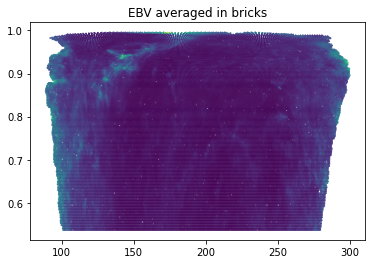

In [8]:
densvar.plot_brickprop('ELG','EBV','N')

19577700
maximum brickid is 660727
randoms done


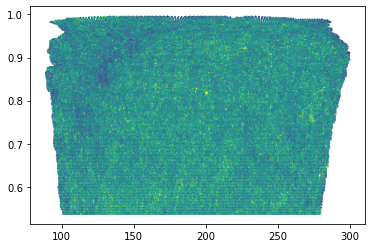

In [7]:
densvar.plot_brickdens('ELG',reg='N')

### Though, we can also see by eye that the depth is generally higher where EBV is higher, so we will want to be careful

19577700
maximum brickid is 660727
38.58268737792969 1626.160160459321


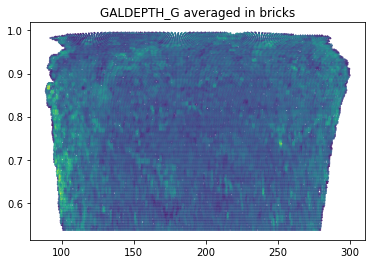

In [9]:
densvar.plot_brickprop('ELG','GALDEPTH_G','N')

### Look at the overall number density trends, using the property map produced by the target selection code

19577700
randoms done
97947
97947


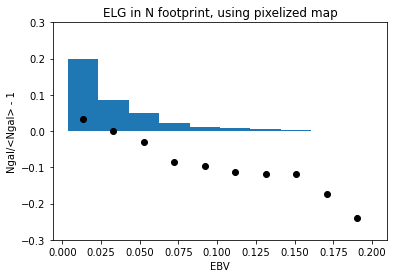

fraction of randoms not included in plot: 0.001501234642596493


In [10]:
densvar.densvsimpar_pix('ELG','EBV',reg='N',vmax=.2)

19577700
randoms done
97947
97947


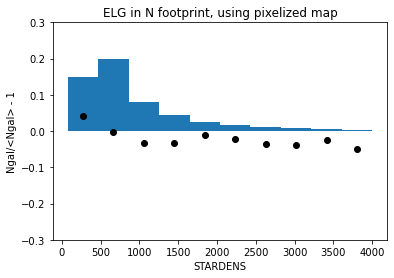

fraction of randoms not included in plot: 0.0012613228091448844


In [11]:
densvar.densvsimpar_pix('ELG','STARDENS',reg='N',vmax=4000)

19577700
randoms done
97947
97947


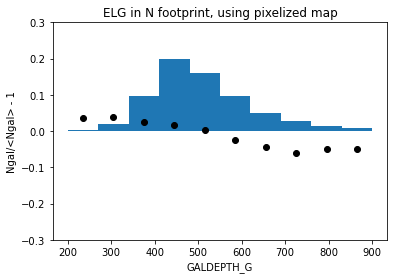

fraction of randoms not included in plot: 0.015533345854126043


In [24]:
densvar.densvsimpar_pix('ELG','GALDEPTH_G',reg='N',vmin=200,vmax=900)

19577700
randoms done
97947
97947


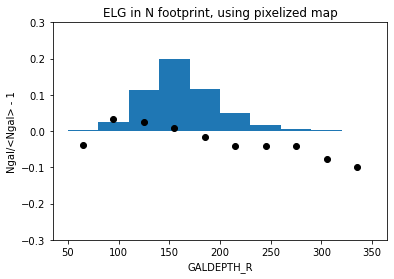

fraction of randoms not included in plot: 0.0038154804896218175


In [19]:
densvar.densvsimpar_pix('ELG','GALDEPTH_R',reg='N',vmin=50,vmax=350)

19577700
randoms done
97947
97947


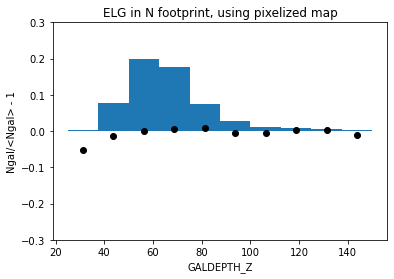

fraction of randoms not included in plot: 0.004165894621143081


In [20]:
densvar.densvsimpar_pix('ELG','GALDEPTH_Z',reg='N',vmin=25,vmax=150)

19577700
randoms done
97947
97947


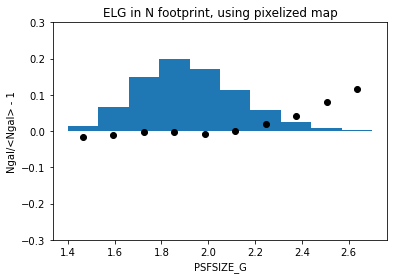

fraction of randoms not included in plot: 0.003897832012137606


In [21]:
densvar.densvsimpar_pix('ELG','PSFSIZE_G',reg='N',vmin=1.4,vmax=2.7)

19577700
randoms done
97947
97947


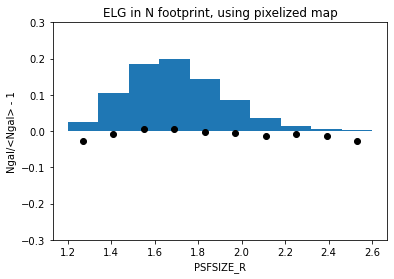

fraction of randoms not included in plot: 0.0017560621854833592


In [22]:
densvar.densvsimpar_pix('ELG','PSFSIZE_R',reg='N',vmin=1.2,vmax=2.6)

19577700
randoms done
97947
97947


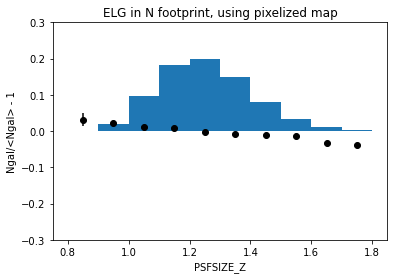

fraction of randoms not included in plot: 0.002110257764467083


In [23]:
densvar.densvsimpar_pix('ELG','PSFSIZE_Z',reg='N',vmin=.8,vmax=1.8)

### So, the trend with extinction is clearly strongest
### Test against a couple of extra derived maps, total expected (S/N)^2 for a flat 1 nmaggie source (EBV reduces S) and fraction that are MORPHTYPE = PSF

19577700
randoms done
97947
97947


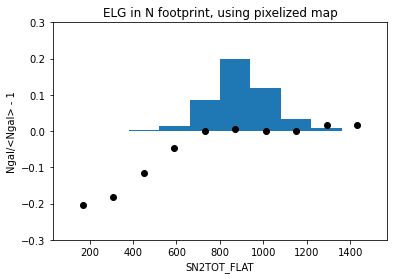

fraction of randoms not included in plot: 0.001575393028943619


In [25]:
densvar.densvsimpar_pix('ELG','SN2TOT_FLAT',reg='N',vmax=1500,vmin=100)

In [61]:
importlib.reload(densvar)

256 True
test
8135999
7815170
7439838


<module 'densvar' from '/global/u2/a/ajross/LSS/Sandbox/imaging/densvar.py'>

19577700
randoms done
97947
97947


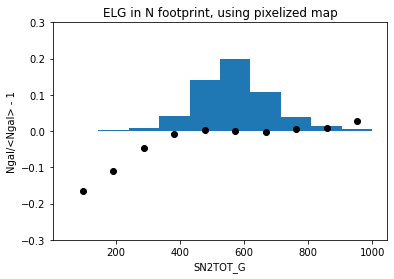

fraction of randoms not included in plot: 0.005208943879538209


In [65]:
densvar.densvsimpar_pix('ELG','SN2TOT_G',reg='N',vmax=1000,vmin=50)

19577700
randoms done
97947
97947


/global/u2/a/ajross/LSS/Sandbox/imaging/densvar.py:448: RuntimeWarning: invalid value encountered in true_divide
  parv = pixlgp[wp]/pixlg[wp]


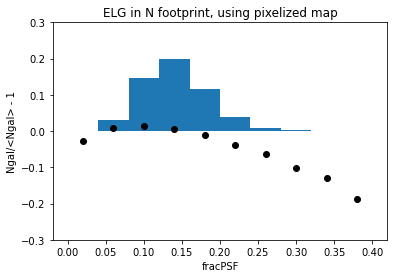

fraction of randoms not included in plot: 0.0013138429127901579


In [26]:
densvar.densvsimpar_pix('ELG','fracPSF',reg='N',vmax=.4,vmin=0)

### Those are similarly dramatic, and could be explained by overall S/N issues. Any chance they are driving things rather than EBV?
### No, cutting on these quantities doesn't remove trend with EBV, cutting on EBV does remove trends here (only showing latter)

19577700
randoms done
97947
68581


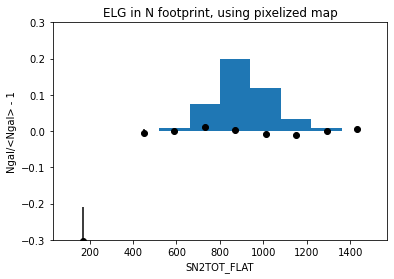

fraction of randoms not included in plot: 0.0015487195592056014


In [28]:
densvar.densvsimpar_pix('ELG','SN2TOT_FLAT',reg='N',vmax=1500,vmin=100,ebvcut=0.04)

19577700
randoms done
97947
68581


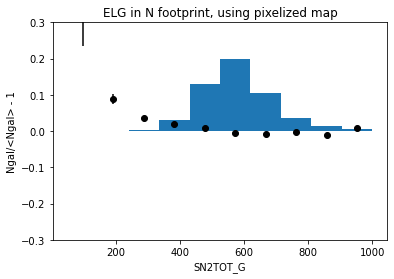

fraction of randoms not included in plot: 0.005912060892930951


In [66]:
densvar.densvsimpar_pix('ELG','SN2TOT_G',reg='N',vmax=1000,vmin=50,ebvcut=0.04)

19577700
randoms done
97947
68581


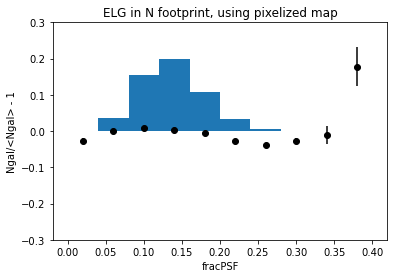

fraction of randoms not included in plot: 1.5908475593894325e-05


In [29]:
densvar.densvsimpar_pix('ELG','fracPSF',reg='N',vmax=.4,vmin=0,ebvcut=0.04)

### Pretty convincing EBV is driving the trend. If we remove EBV trend, do the rest look better?
### Also, going to add fluctuations expected from S/N variations, assuming Gaussian flux errors, etc., as in MCEff_ELG.py

In [30]:
#get MC efficiency
import os
import numpy as np
#from MCeff_ELG import *
mcf = fitsio.read(os.getenv('SCRATCH')+'/DR9mELGMCeffHSCHPext.fits')
mmc = np.mean(mcf['EFFALL'])
mcl = np.zeros(12*densvar.nside*densvar.nside)
for i in range(0,len(mcf)):
    pix = mcf['HPXPIXEL'][i]
    mcl[pix] = mcf['EFFALL'][i]/mmc

In [32]:
#load in pixel file as we will use it to define weights
pixfn      = '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.42.0/pixweight/main/resolve/dark/pixweight-dark.fits'
pf = fitsio.read(pixfn)


19577700
randoms done
97947
97532
786432 786432 786432 97532


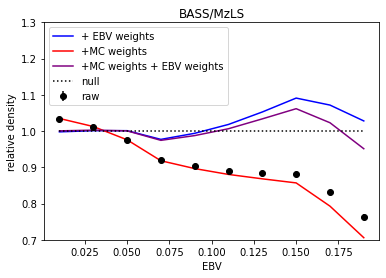

In [33]:
ws = 1./(1.05-.25/.15*pf['EBV']) #approximate linear relationship
densvar.plotvshp_compmc('ELG','EBV',(0,.2),mcl,ws,reg='N',title='BASS/MzLS',effac=1,gdzm=0)

19577700
randoms done
97947
97532
786432 786432 786432 97532


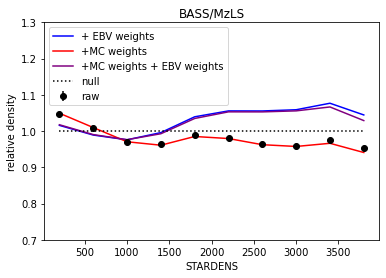

In [34]:
densvar.plotvshp_compmc('ELG','STARDENS',(0,4000),mcl,ws,reg='N',title='BASS/MzLS',effac=1,gdzm=0)

### residual with stellar density is a bit weird...define extra weight for that

In [35]:
wss = np.ones(len(ws))
ss = pf['STARDENS'] > 1650
wss[ss] = .94

19577700
randoms done
97947
97532
786432 786432 786432 97532


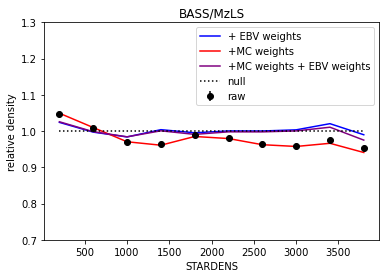

In [36]:
densvar.plotvshp_compmc('ELG','STARDENS',(0,4000),mcl,ws*wss,reg='N',title='BASS/MzLS',effac=1,gdzm=0)

19577700
randoms done
97947
97532
786432 786432 786432 97532


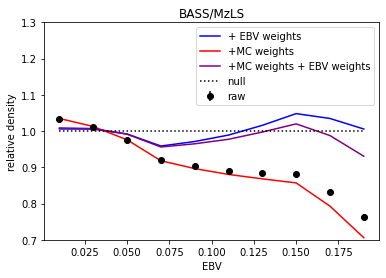

In [37]:
densvar.plotvshp_compmc('ELG','EBV',(0,.2),mcl,ws*wss,reg='N',title='BASS/MzLS',effac=1,gdzm=0)

### ok, not exactly perfect, but enough for illustration; look at the rest using same weights

19577700
randoms done
97947
97532
786432 786432 786432 97532


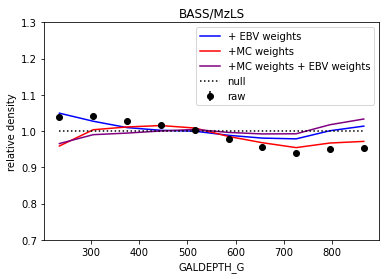

In [39]:
densvar.plotvshp_compmc('ELG','GALDEPTH_G',(200,900),mcl,ws*wss,reg='N',title='BASS/MzLS')

19577700
randoms done
97947
97532
786432 786432 786432 97532


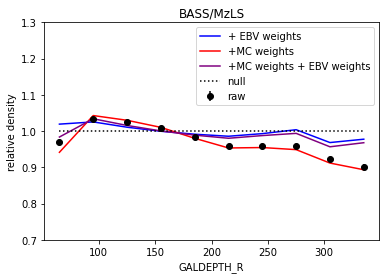

In [41]:
densvar.plotvshp_compmc('ELG','GALDEPTH_R',(50,350),mcl,ws*wss,reg='N',title='BASS/MzLS')

19577700
randoms done
97947
97532
786432 786432 786432 97532


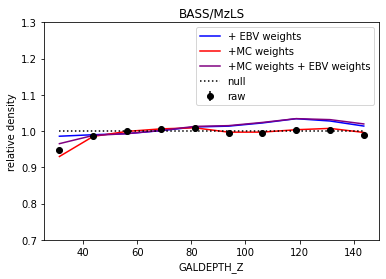

In [42]:
densvar.plotvshp_compmc('ELG','GALDEPTH_Z',(25,150),mcl,ws*wss,reg='N',title='BASS/MzLS')

### some residual with Z band depth; not clear if MC helps anything (at this point, it needs work)

19577700
randoms done
97947
97532
786432 786432 786432 97532


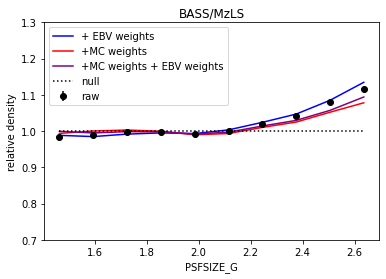

In [43]:
densvar.plotvshp_compmc('ELG','PSFSIZE_G',(1.4,2.7),mcl,ws*wss,reg='N',title='BASS/MzLS')

19577700
randoms done
97947
97532
786432 786432 786432 97532


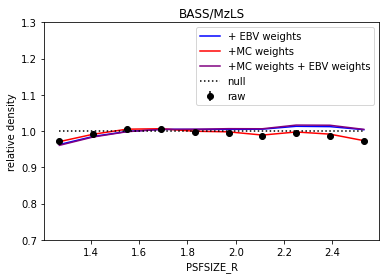

In [44]:
densvar.plotvshp_compmc('ELG','PSFSIZE_R',(1.2,2.6),mcl,ws*wss,reg='N',title='BASS/MzLS')

19577700
randoms done
97947
97532
786432 786432 786432 97532


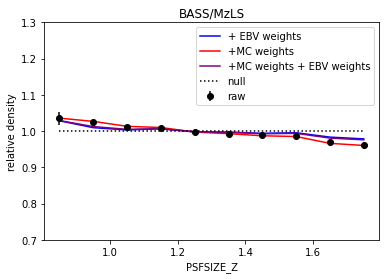

In [45]:
densvar.plotvshp_compmc('ELG','PSFSIZE_Z',(0.8,1.8),mcl,ws*wss,reg='N',title='BASS/MzLS')

### Nothing exciting cropping up with PSFSIZE; increase in target density at rather poor g-band seeing is interesting but very small portion of footprint

## Now, WHY would we see this kind of trend with EBV?

### If extinction map or band coefficients are mis-calibrated in this area, we would see trends with EBV. Can use MC to determine degree needed to reproduce observed results

In [46]:
import MCeff_ELG as MC

0.01485120570449451


In [51]:
#this simulates effect of 25% calibration error in the region's EBV values; print out compares to relationship used above to get everything flat
ev = np.arange(0,.15,.01)
rf = 1.
gf=1.
zf = 1.
v=0
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=gf,rf=rf,zf=zf)
EBVfac = 0.25
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=10.**(-0.4*MC.R_G*v*EBVfac),rf=10.**(-0.4*MC.R_R*v*EBVfac),zf=10.**(-0.4*MC.R_Z*v*EBVfac))/e0
    ee = 1.0-.25/.15*v #used above
    print(ef,ee)
    pl.append(ef)

1.0 1.0
0.9808102345415779 0.9833333333333333
0.9622867803837954 0.9666666666666667
0.9436300639658849 0.95
0.9252398720682303 0.9333333333333333
0.9096481876332622 0.9166666666666666
0.8871268656716418 0.9
0.8690031982942431 0.8833333333333333
0.8523454157782517 0.8666666666666667
0.8380863539445629 0.85
0.8231609808102345 0.8333333333333333
0.8094349680170576 0.8166666666666667
0.7983742004264393 0.8
0.7866471215351812 0.7833333333333333
0.7741204690831557 0.7666666666666666


In [55]:
#this simulates effect of 12% calibration error in the region's R_G, assuming the rest are ok
ev = np.arange(0,.15,.01)
rf = 1.
gf=1.
zf = 1.
v=0
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=gf,rf=rf,zf=zf)
EBVfac = 0.12
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=10.**(-0.4*MC.R_G*v*EBVfac),rf=1.,zf=1.)/e0
    ee = 1.0-.25/.15*v #used above
    print(ef,ee)
    pl.append(ef)

1.0 1.0
0.9818763326226012 0.9833333333333333
0.9654850746268658 0.9666666666666667
0.9468283582089553 0.95
0.9287046908315565 0.9333333333333333
0.9109808102345417 0.9166666666666666
0.8955223880597015 0.9
0.8776652452025586 0.8833333333333333
0.8624733475479744 0.8666666666666667
0.8470149253731343 0.85
0.8334221748400854 0.8333333333333333
0.8199626865671641 0.8166666666666667
0.8061034115138593 0.8
0.7945095948827292 0.7833333333333333
0.78158315565032 0.7666666666666666


### So, it takes a 25% offset in EBV calibration, or a 12% offset in R_G (with other coefficients unaffected) to reproduce the trends
### If we look at the flux dependence, does this remain consistent?

19577700
11666658
1356720
randoms done
97947
97947


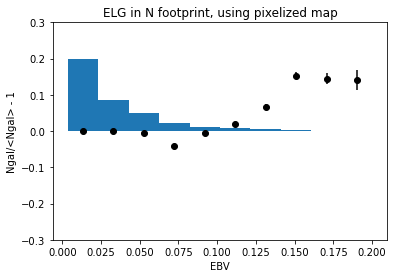

fraction of randoms not included in plot: 0.001501234642596493


In [56]:
#look at EBV relationship when a brighter flux cut is applied
densvar.densvsimpar_pix('ELG','EBV',reg='N',vmax=.2,gfluxcut=.8)

### That flux cut removes trend, what does MC say?

In [58]:
importlib.reload(MC)

0.01485120570449451


<module 'MCeff_ELG' from '/global/u2/a/ajross/LSS/Sandbox/imaging/MCeff_ELG.py'>

In [59]:
#this simulates effect of 12% calibration error in the region's R_G, assuming the rest are ok, now we apply gflux cut
ev = np.arange(0,.15,.01)
rf = 1.
gf=1.
zf = 1.
gcut = .8
v=0
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=gf,rf=rf,zf=zf,gfluxcut=gcut)
EBVfac = 0.12
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=10.**(-0.4*MC.R_G*v*EBVfac),rf=1.,zf=1.,gfluxcut=gcut)/e0
    ee = 1.0-.25/.15*v #used above
    print(ef)
    pl.append(ef)

1.0
0.9726603575184017
0.9453207150368034
0.9211356466876972
0.9064143007360673
0.8769716088328076
0.8601472134595164
0.843322818086225
0.8264984227129338
0.7991587802313355
0.7812828601472135
0.7665615141955835
0.7423764458464774
0.7350157728706624
0.7118822292323869


In [60]:
#this simulates effect of 25% calibration error in the region's EBV values; print out compares to relationship used above to get everything flat
ev = np.arange(0,.15,.01)
rf = 1.
gf=1.
zf = 1.
v=0
gcut = 0.8
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=gf,rf=rf,zf=zf,gfluxcut=gcut)
EBVfac = 0.25
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=10.**(-0.4*MC.R_G*v*EBVfac),rf=10.**(-0.4*MC.R_R*v*EBVfac),zf=10.**(-0.4*MC.R_Z*v*EBVfac),gfluxcut=gcut)/e0
    ee = 1.0-.25/.15*v #used above
    print(ef)
    pl.append(ef)

1.0
0.9768664563617244
0.9463722397476341
0.9242902208201893
0.8990536277602523
0.8843322818086224
0.861198738170347
0.8412197686645636
0.8170347003154574
0.8012618296529967
0.7823343848580442
0.7634069400630915
0.7528916929547844
0.732912723449001
0.7118822292323869


### Shoot, MC expects even more dramatic change, either way...This suggests it is NOT some global extinction calibration

So, what is it??? Rongpu has pointed out that maybe SED implies pretty different R_G with redshift if the emission is line dominated. This would affect all regions, though...

### Next, look at color/mag histograms to isolate region we are missing ELGs from at high EBV

### No convenient functions for this, load in data/randoms

In [67]:
ef = '/project/projectdirs/desi/users/ajross/dr9/ELGtargetDR9m42wivar.fits' #where I wrote the ELG target file
felg = fitsio.read(ef)

In [68]:
#cut it to BASS/MzLS region
wd = felg['PHOTSYS'] == 'N'
felg = felg[wd]
print(len(felg))

11666658


In [69]:
#read randoms
rall = fitsio.read('/global/cfs/cdirs/desi/target/catalogs/dr9m/0.42.0/randoms/resolve/randoms-randomized-1.fits')

In [70]:
#cut randoms to ELG footprint
keep = (rall['NOBS_G']>0) & (rall['NOBS_R']>0) & (rall['NOBS_Z']>0)
print(len(rall[keep]))
elgbits = [1,5,6,7,11,12,13]
keepelg = keep
for bit in elgbits:
    keepelg &= ((rall['MASKBITS'] & 2**bit)==0)
print(len(rall[keepelg]))
relg = rall[keepelg]

7815170
7439838


In [71]:
#cut randoms to BASS/MzLS
wn = relg['PHOTSYS'] == 'N'
relg = relg[wn]
print(len(relg))

4760082


In [78]:
ebvsplit = 0.1 #compare densities splitting sample at this ebv
wes = relg['EBV'] > ebvsplit
wed = felg['EBV'] > ebvsplit
fa = len(relg[wes])/len(relg[~wes]) #relative number of randoms on either side of split; to be used to compare densities
print(fa)

0.05100278510940177


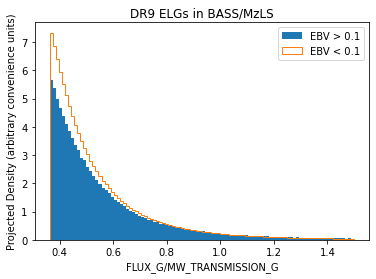

In [79]:
a = plt.hist(felg[wed]['FLUX_G']/felg[wed]['MW_TRANSMISSION_G'],bins=100,weights=np.ones(len(felg[wed]))/fa*1.e-5,range=(0.363,1.5),label='EBV > 0.1')
b = plt.hist(felg[~wed]['FLUX_G']/felg[~wed]['MW_TRANSMISSION_G'],weights=np.ones(len(felg[~wed]))*1.e-5,bins=a[1],histtype='step',label='EBV < 0.1')
plt.xlabel('FLUX_G/MW_TRANSMISSION_G')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend()
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

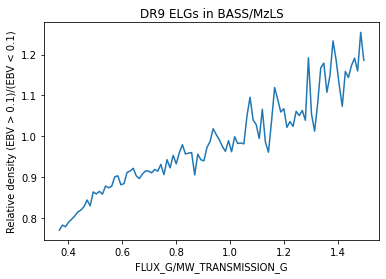

In [80]:
xl = []
for i in range(0,len(a[1])-1):
    xl.append((a[1][i]+a[1][i+1])/2.)
plt.plot(xl,a[0]/b[0])
plt.ylabel('Relative density (EBV > 0.1)/(EBV < 0.1)')
plt.xlabel('FLUX_G/MW_TRANSMISSION_G')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

## Very clearly, we are missing ELG targets on the faint end at high extinction. BUT plots above suggest this is NOT due to S/N cuts (unless somehow S/N cuts are systematically different than S/N estimates in catalogs)

### For completeness, look at other bands and colors

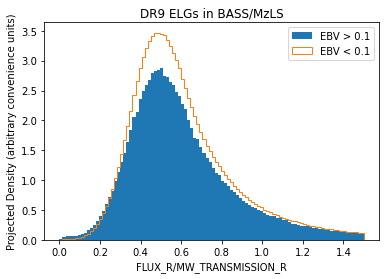

In [82]:
a = plt.hist(felg[wed]['FLUX_R']/felg[wed]['MW_TRANSMISSION_R'],bins=100,weights=np.ones(len(felg[wed]))/fa*1.e-5,range=(0,1.5),label='EBV > 0.1')
b = plt.hist(felg[~wed]['FLUX_R']/felg[~wed]['MW_TRANSMISSION_R'],weights=np.ones(len(felg[~wed]))*1.e-5,bins=a[1],histtype='step',label='EBV < 0.1')
plt.xlabel('FLUX_R/MW_TRANSMISSION_R')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend()
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

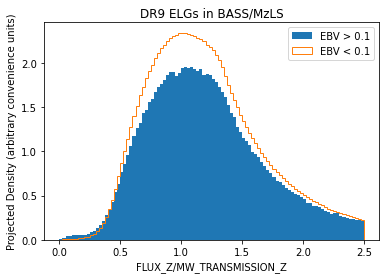

In [84]:
a = plt.hist(felg[wed]['FLUX_Z']/felg[wed]['MW_TRANSMISSION_Z'],bins=100,weights=np.ones(len(felg[wed]))/fa*1.e-5,range=(0,2.5),label='EBV > 0.1')
b = plt.hist(felg[~wed]['FLUX_Z']/felg[~wed]['MW_TRANSMISSION_Z'],weights=np.ones(len(felg[~wed]))*1.e-5,bins=a[1],histtype='step',label='EBV < 0.1')
plt.xlabel('FLUX_Z/MW_TRANSMISSION_Z')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend()
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

In [85]:
#convert to magnitudes for colors
g = 22.5 - 2.5*np.log10(felg['FLUX_G']/felg['MW_TRANSMISSION_G'])
r = 22.5 - 2.5*np.log10(felg['FLUX_R']/felg['MW_TRANSMISSION_R'])
z = 22.5 - 2.5*np.log10(felg['FLUX_Z']/felg['MW_TRANSMISSION_Z'])

In [86]:
gmr = g-r
rmz = r-z
c02 = gmr +1.2*rmz #color combos used in selection
clz = gmr-1.15*rmz 

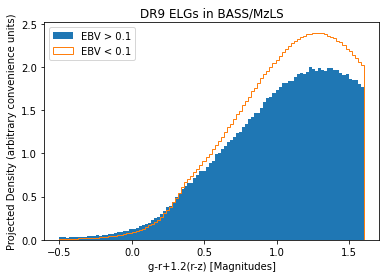

In [93]:
a = plt.hist(c02[wed],bins=100,range=(-.5,1.6),weights=np.ones(len(felg[wed]))/fa*1.e-5,label='EBV > 0.1')
b = plt.hist(c02[~wed],bins=a[1],range=(-.5,1.6),weights=np.ones(len(felg[~wed]))*1.e-5,label='EBV < 0.1',histtype='step')
plt.xlabel('g-r+1.2(r-z) [Magnitudes]')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend(loc='upper left')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

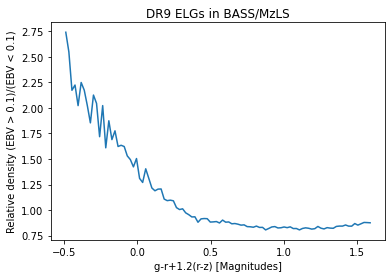

In [94]:
xl = []
for i in range(0,len(a[1])-1):
    xl.append((a[1][i]+a[1][i+1])/2.)
plt.plot(xl,a[0]/b[0])
plt.ylabel('Relative density (EBV > 0.1)/(EBV < 0.1)')
plt.xlabel('g-r+1.2(r-z) [Magnitudes]')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

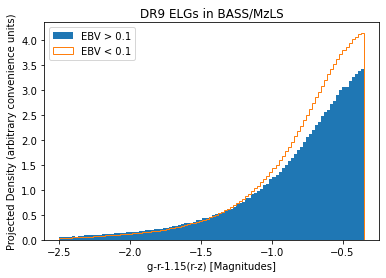

In [95]:
a = plt.hist(clz[wed],bins=100,range=(-2.5,-.35),weights=np.ones(len(felg[wed]))/fa*1.e-5,label='EBV > 0.1')
b = plt.hist(clz[~wed],bins=a[1],range=(-2.5,-.35),weights=np.ones(len(felg[~wed]))*1.e-5,label='EBV < 0.1',histtype='step')
plt.xlabel('g-r-1.15(r-z) [Magnitudes]')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend(loc='upper left')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

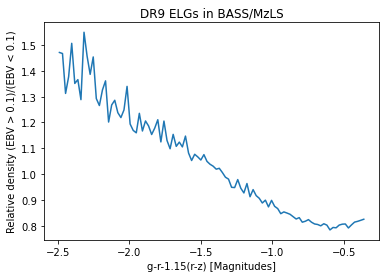

In [96]:
xl = []
for i in range(0,len(a[1])-1):
    xl.append((a[1][i]+a[1][i+1])/2.)
plt.plot(xl,a[0]/b[0])
plt.ylabel('Relative density (EBV > 0.1)/(EBV < 0.1)')
plt.xlabel('g-r-1.15(r-z) [Magnitudes]')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

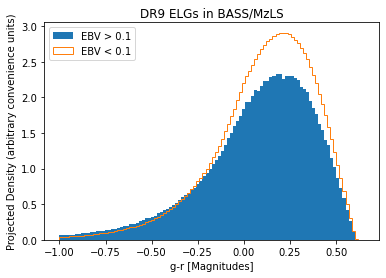

In [90]:
a = plt.hist(gmr[wed],bins=100,range=(-1.,.65),weights=np.ones(len(felg[wed]))/fa*1.e-5,label='EBV > 0.1')
b = plt.hist(gmr[~wed],bins=a[1],range=(-1.,.65),weights=np.ones(len(felg[~wed]))*1.e-5,label='EBV < 0.1',histtype='step')
plt.xlabel('g-r [Magnitudes]')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend(loc='upper left')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

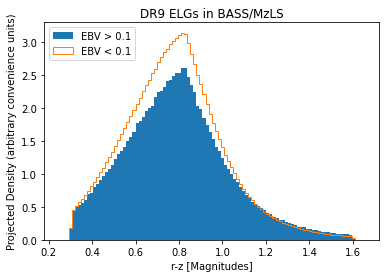

In [91]:
a = plt.hist(rmz[wed],bins=100,range=(.25,1.65),weights=np.ones(len(felg[wed]))/fa*1.e-5,label='EBV > 0.1')
b = plt.hist(rmz[~wed],bins=a[1],range=(.25,1.65),weights=np.ones(len(felg[~wed]))*1.e-5,label='EBV < 0.1',histtype='step')
plt.xlabel('r-z [Magnitudes]')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend(loc='upper left')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

## Clearly, ELGs are missing closest to the edges of the selection, clearest trend is with g flux threshold

### What about bias in fluxes that is proportional to EBV, like somehow a sky background effect?

In [97]:
importlib.reload(MC)

0.01485120570449451


<module 'MCeff_ELG' from '/global/u2/a/ajross/LSS/Sandbox/imaging/MCeff_ELG.py'>

In [101]:
ev = np.arange(0,.15,.01)
v=0
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False)
EBVfac = 0.11 #this gets multiplied by the EBV value and applied as an offset to the g flux
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,dg=-EBVfac*v)/e0
    ee = 1.0-.25/.15*v #used above
    print(ef,ee)
    pl.append(ef)

1.0 1.0
0.9857965965429453 0.9833333333333333
0.9729331368082541 0.9666666666666667
0.9588637277234358 0.95
0.945464290499799 0.9333333333333333
0.928580999598017 0.9166666666666666
0.9126356693018894 0.9
0.8973603108669438 0.8833333333333333
0.8804770199651615 0.8666666666666667
0.8649336727857431 0.85
0.8477823931394881 0.8333333333333333
0.8272812541873242 0.8166666666666667
0.8067801152351602 0.8
0.7900308187056144 0.7833333333333333
0.7685917191477959 0.7666666666666666


### So, a flux bias of delta g = -0.11*EBV does the trick for the full sample, see what happens with increased threshold

In [103]:
ev = np.arange(0,.15,.01)
v=0
gfc = 0.8
e0 = MC.ELGeffcalcExt(0.01,0.01,0.01,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gfluxcut=gfc)
EBVfac = 0.11 #this gets multiplied by the EBV value and applied as an offset to the g flux
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.01,0.01,0.01,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,dg=-EBVfac*v,gfluxcut=gfc)/e0
    ee = 1.0-.25/.15*v #used above
    print(ef,ee)
    pl.append(ef)

1.0 1.0
0.9915074309978767 0.9833333333333333
0.9787685774946921 0.9666666666666667
0.9723991507430997 0.95
0.9660297239915073 0.9333333333333333
0.9554140127388534 0.9166666666666666
0.9447983014861996 0.9
0.9299363057324841 0.8833333333333333
0.9225053078556261 0.8666666666666667
0.9108280254777069 0.85
0.9012738853503185 0.8333333333333333
0.8906581740976645 0.8166666666666667
0.8800424628450106 0.8
0.8662420382165604 0.7833333333333333
0.8524416135881103 0.7666666666666666


### The trend is weakened, but still there. It does not seem like a constant flux bias that is EBV dependent could explain things either

In [107]:
#flat deltas
ev = np.arange(0,.15,.01)
v=0
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False)
EBVfac = 0.18 #this gets multiplied by the EBV value and applied as an offset to the g flux
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,dg=-EBVfac*v,dr=-EBVfac*v,dz=-EBVfac*v)/e0
    ee = 1.0-.25/.15*v #used above
    print(ef,ee)
    pl.append(ef)

1.0 1.0
0.9872705346375452 0.9833333333333333
0.976550984858636 0.9666666666666667
0.9606056545625085 0.95
0.9438563580329626 0.9333333333333333
0.9321988476483988 0.9166666666666666
0.9158515342355622 0.9
0.8970923221224708 0.8833333333333333
0.878467104381616 0.8666666666666667
0.8629237572021976 0.85
0.8447005225780517 0.8333333333333333
0.8298271472598152 0.8166666666666667
0.8133458394747421 0.8
0.7931126892670509 0.7833333333333333
0.7707356291035777 0.7666666666666666


In [108]:
#flat deltas
ev = np.arange(0,.15,.01)
v=0
gfc=.8
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gfluxcut=gfc)
EBVfac = 0.18 #this gets multiplied by the EBV value and applied as an offset to the g flux
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,dg=-EBVfac*v,dr=-EBVfac*v,dz=-EBVfac*v,gfluxcut=gfc)/e0
    ee = 1.0-.25/.15*v #used above
    print(ef,ee)
    pl.append(ef)

1.0 1.0
0.9903329752953813 0.9833333333333333
0.9860365198711062 0.9666666666666667
0.9806659505907626 0.95
0.978517722878625 0.9333333333333333
0.9688506981740064 0.9166666666666666
0.9591836734693877 0.9
0.949516648764769 0.8833333333333333
0.945220193340494 0.8666666666666667
0.9334049409237378 0.85
0.9205155746509129 0.8333333333333333
0.9119226638023631 0.8166666666666667
0.9044038668098817 0.8
0.8904403866809882 0.7833333333333333
0.8775510204081631 0.7666666666666666


### giving all bands the bias doesn't work either

### Test different combos for different bands, nothing really worked that I tried

In [116]:
ev = np.arange(0,.15,.01)
v=0
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False)
gfac = -0.08 #this gets multiplied by the EBV value and applied as an offset to the g flux
rfac = .08
zfac = .0
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,dg=gfac*v,dr=rfac*v,dz=zfac*v)/e0
    ee = 1.0-.25/.15*v #used above
    print(ef,ee)
    pl.append(ef)

1.0 1.0
0.9851266246817635 0.9833333333333333
0.9691812943856359 0.9666666666666667
0.9533699584617447 0.95
0.9376926169100899 0.9333333333333333
0.9206753316360713 0.9166666666666666
0.9025860913841619 0.9
0.884630845504489 0.8833333333333333
0.8637277234356158 0.8666666666666667
0.8441645450891063 0.85
0.8262092992094333 0.8333333333333333
0.8054401715127965 0.8166666666666667
0.7850730269328688 0.8
0.7652418598418868 0.7833333333333333
0.7438027602840682 0.7666666666666666


In [117]:
ev = np.arange(0,.15,.01)
v=0
gfc=.8
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gfluxcut=gfc)
gfac = -0.08 #this gets multiplied by the EBV value and applied as an offset to the g flux
rfac = 0.08
zfac = .0
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,dg=gfac*v,dr=rfac*v,dz=zfac*v,gfluxcut=gfc)/e0
    ee = 1.0-.25/.15*v #used above
    print(ef,ee)
    pl.append(ef)

1.0 1.0
0.987110633727175 0.9833333333333333
0.9774436090225563 0.9666666666666667
0.9720730397422126 0.95
0.9613319011815251 0.9333333333333333
0.9527389903329753 0.9166666666666666
0.9419978517722878 0.9
0.9291084854994629 0.8833333333333333
0.9129967776584317 0.8666666666666667
0.894736842105263 0.85
0.8839957035445757 0.8333333333333333
0.8678839957035446 0.8166666666666667
0.8560687432867885 0.8
0.8431793770139634 0.7833333333333333
0.8292158968850698 0.7666666666666666
